In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d

# Generation of Dataset 1

In [2]:
A = np.random.normal(size=(3, 2))
print('The rank of A is %d' % np.linalg.matrix_rank(A))

The rank of A is 2


In [3]:
V = np.random.normal(size=(2, 500))
X = A @ V
print('The rank of X is %d' % np.linalg.matrix_rank(X))

The rank of X is 2


# Singular Value and Eigenvalue Decomposition of Dataset 1

In [4]:
U, Sigma, V = np.linalg.svd(X)
Lambda, W = np.linalg.eig(X @ X.T)
print('The left singular vectors of X are:')
print(U)
print('The eigenvectors of XX^T are:')
print(W)
print()
print('The singular values squares of X are %s' % ', '.join(['%.4g' % (s*s) for s in Sigma]))
print('The eigenvalues of X are %s' % ', '.join(['%.2g' % e for e in Lambda]))
print()
print('The energy in X is %6.4f' % np.linalg.norm(X, 'fro')**2)
print('The sum of singular values squared is %6.4f' % sum([s*s for s in Sigma]))

The left singular vectors of X are:
[[ 0.01864008  0.87427073  0.48508066]
 [-0.98860983  0.08858475 -0.12166902]
 [-0.14934241 -0.47728758  0.86596386]]
The eigenvectors of XX^T are:
[[-0.48508066 -0.87427073  0.01864008]
 [ 0.12166902 -0.08858475 -0.98860983]
 [-0.86596386  0.47728758 -0.14934241]]

The singular values squares of X are 2859, 485.2, 1.116e-29
The eigenvalues of X are 5.7e-14, 4.9e+02, 2.9e+03

The energy in X is 3343.8495
The sum of singular values squared is 3343.8495


In this case, the last singular value is not exactly 0, most likely because we never centered the mean. It is still very small because the average of samples from a gaussian distribution with mean 0 tends to 0 (by the Law of Large Numbers), but not exactly 0.

The top two singular vectors of X correspond to the column space of A, or in other words, $span\{u_1, u_2\} = col(A)$

# PCA of Dataset 1

Based on our knowledge, two principal components should be sufficient to capture all of the variation in the data (because the third singular value is much much smaller than the other two).

To show that the expected value of each entry in $x$ is 0, observe that 
$X_k = \sum_{i=1}^2 A_{k, i}v_{i}$. Also note that the product of two Gaussian random variables with mean 0 will have mean 0. This means $\mathbb{E}(x_k) = \sum_{i=1}^2 \mathbb{E}(A_{k, i}v_{i}) = 0$

In [5]:
x_mean = np.mean(X, axis=1)
print('The means are: %s' % ', '.join(['x%d = %4.3f' % (i+1, x) for i, x in enumerate(x_mean)]))

The means are: x1 = -0.037, x2 = -0.008, x3 = 0.020


In [6]:
U2 = U[:, :2]
print(U2)

[[ 0.01864008  0.87427073]
 [-0.98860983  0.08858475]
 [-0.14934241 -0.47728758]]


In [7]:
X_feature = U2.T @ X
X_reconstruct = U2 @ X_feature
print("The representation error for two principal components is {}".format(np.linalg.norm(X - X_reconstruct, 'fro')**2))

The representation error for two principal components is 1.1166344014771792e-28


In [8]:
U1 = U[:, :1]
X_feature1 = U1.T @ X
X_reconstruct1 = U1 @ X_feature1
print("The representation error for one principal component is {}".format(np.linalg.norm(X - X_reconstruct1, 'fro')**2))
print("For reference, the second largest singular value squared is {}".format(Sigma[1]**2))

The representation error for one principal component is 485.1922223405521
For reference, the second largest singular value squared is 485.1922223405523


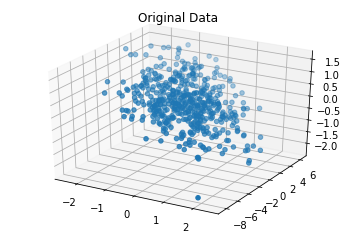

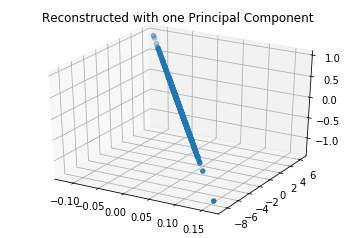

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X)
plt.title('Original Data')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X_reconstruct1)
plt.title('Reconstructed with one Principal Component')
plt.show()

# Generation of Dataset \#2

In [10]:
c = np.random.normal(size=(3, 1))
A = np.random.normal(size=(3, 2))
V = np.random.normal(size=(2, 500))
X = A @ V + c
print('The rank of X is %d' % np.linalg.matrix_rank(X))

The rank of X is 3


# PCA, Centering, and Dataset \# 2

In [11]:
U, Sigma, V = np.linalg.svd(X)
U2 = U[:, :2]
print("The top two principal components are:\n{}".format(U2))

The top two principal components are:
[[-0.26940977  0.71686074]
 [-0.70220293  0.31073968]
 [-0.65903673 -0.62414064]]


In [12]:
X_reconstruct = U2 @ U2.T @ X
print("The representation error is {}, which is not 0".format(np.linalg.norm(X - X_reconstruct, 'fro')**2))

The representation error is 186.60111603326305, which is not 0


In [13]:
x_mean = np.reshape(np.mean(X, axis=1), (3, 1))
X_centered = X - x_mean
U_centered, Sigma_centered, V_centered = np.linalg.svd(X_centered)
U2_centered = U_centered[:, :2]
X_reconstruct_centered = U2_centered @ U2_centered.T @ X_centered + x_mean
print("The representation error is {}, which is basically 0".format(np.linalg.norm(X - X_reconstruct_centered, 'fro')**2))

The representation error is 1.0000853459417375e-27, which is basically 0


# Generation of Dataset \#3

In [14]:
A = np.random.normal(size=(3, 2))
V = np.random.normal(size=(2, 500))
n = np.random.normal(loc=0, scale=.01, size=(3, 500))
X = A @ V + n
print('The rank of X is %d' % np.linalg.matrix_rank(X))

The rank of X is 3


In [15]:
X_normalized = np.divide(X, np.reshape(np.linalg.norm(X, axis=0), (1, 500)))

In [16]:
print('The rank of normalized X is %d' % np.linalg.matrix_rank(X_normalized))
U, Sigma, V = np.linalg.svd(X_normalized)
print('The singular values of normalized X are {}'.format(Sigma))

The rank of normalized X is 3
The singular values of normalized X are [19.62848137 10.70582194  0.32877901]


# PCA Denoising of Dataset \#3

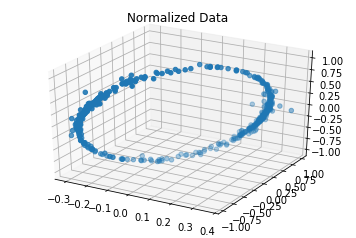

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X_normalized)
plt.title('Normalized Data')
plt.show()

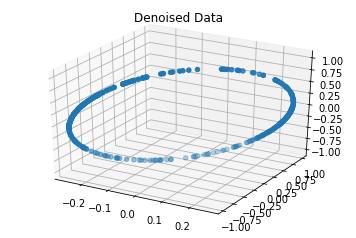

In [18]:
U2 = U[:, :2]
X_denoised = U2 @ U2.T @ X_normalized
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X_denoised)
plt.title('Denoised Data')
plt.show()

In [19]:
print("The representation error after denoising is {}".format(np.linalg.norm(X_normalized - X_denoised, 'fro')**2))
print("For reference, the smallest singular value squared is {}".format(Sigma[2]**2))

The representation error after denoising is 0.10809563852488101
For reference, the smallest singular value squared is 0.10809563852488108


# Real Data

In [20]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)

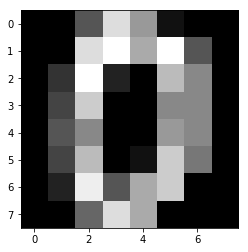

In [21]:
image = np.reshape(images[0], (8, 8))
plt.imshow(image, cmap='gray')

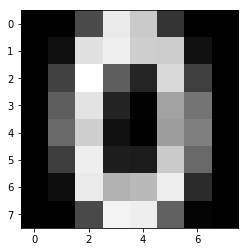

In [22]:
mean = np.mean(images, axis=0)
plt.imshow(np.reshape(mean, (8, 8)), cmap='gray')

In [23]:
X = images - mean
X = X.T
U, Sigma, V = np.linalg.svd(X)

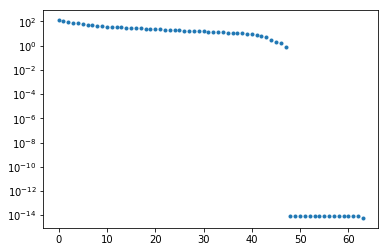

In [24]:
plt.semilogy(Sigma, '.')

In [25]:
fro = .9 * np.linalg.norm(X, 'fro')**2
k = 0
for i, sigma in enumerate(Sigma):
    fro -= sigma**2
    if fro < 0:
        k = i+1
        break
# print(sum([s**2 for s in Sigma[:k]])/np.linalg.norm(X, 'fro')**2)
# print(sum([s**2 for s in Sigma[:k-1]])/np.linalg.norm(X, 'fro')**2)
print('The minimum k is {}'.format(k))


The minimum k is 18


In [26]:
Uk = U[:, :k]
print('The top k principal components of X are:\n{}'.format(Uk))

The top k principal components of X are:
[[-1.11022302e-16 -2.22044605e-16 -2.77555756e-17 ... -8.32667268e-17
   2.77555756e-17 -5.55111512e-17]
 [-1.95709875e-03  1.10073205e-03 -3.42550349e-04 ... -1.98487060e-02
   5.16018662e-03  5.26825715e-03]
 [-1.20211219e-01 -1.15336818e-01  2.67682045e-01 ...  1.29110921e-01
  -5.14522603e-02  1.78843971e-02]
 ...
 [-5.46305101e-02  3.89634953e-01 -9.26316392e-02 ...  2.46090040e-01
   1.44720779e-01 -8.73288615e-02]
 [-1.71685485e-02  5.11440954e-02 -1.99448292e-02 ... -7.08662045e-03
   1.36833546e-02  5.88275559e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


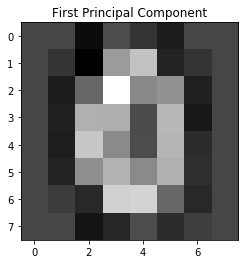

In [27]:
U1 = U[:, 0]
plt.title('First Principal Component')
plt.imshow(np.reshape(U1, (8, 8)), cmap='gray')

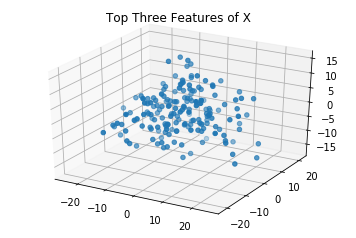

In [28]:
U3 = U[:, :3]
X_features = U3.T @ X
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X_features)
plt.title('Top Three Features of X')
plt.show()

In [29]:
X_reconstruct = U3 @ X_features + np.reshape(mean, (64, 1))
images_reconstruct = X_reconstruct.T
print("The representation error after projection is {}".format(np.linalg.norm(images_reconstruct - images, 'fro')**2))
print("The sum of the energy in the smallest 61 singular values is {}".format(sum([s**2 for s in Sigma[3:]])))

The representation error after projection is 36050.010605737116
The sum of the energy in the smallest 61 singular values is 36050.010605737145


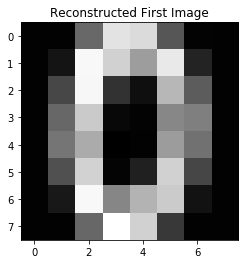

In [30]:
image_reconstruct = np.reshape(images_reconstruct[0], (8, 8))
plt.title('Reconstructed First Image')
plt.imshow(image_reconstruct, cmap='gray')